In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50000000)

from sklearn.naive_bayes import GaussianNB

from sklearn import metrics

from pandas import DataFrame

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from keras.models import Sequential

from keras.layers import Dense, Conv2D

from keras.utils import np_utils

In [7]:
data = pd.read_csv("kddcup99_csv.csv")

In [8]:
data.shape

(494020, 42)

In [9]:
(data.head(10))

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal
8,0,tcp,http,SF,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal
9,0,tcp,http,SF,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [11]:
protocol_types = []
services = []
flags = []


for i in range (494020):
    if(data['service'][i] not in services):
        services.append(data['service'][i])
    
    if(data['protocol_type'][i] not in protocol_types):
        protocol_types.append(data['protocol_type'][i])
        
    if(data['flag'][i] not in flags):
        flags.append(data['flag'][i])

print(protocol_types)
print(services)
print(flags)


protocol_type = []
service = []
flag = []

for i in range (494020):
    protocol_type.append(protocol_types.index(data['protocol_type'][i]))
    
    service.append(services.index(data['service'][i]))
    
    flag.append(flags.index(data['flag'][i]))
    
del data['protocol_type']
del data['service']
del data['flag']

data['protocol_type'] = protocol_type
data['service'] = service
data['flag'] = flag

['tcp', 'udp', 'icmp']
['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp', 'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data', 'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh', 'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf', 'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer', 'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard', 'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2', 'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm', 'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i', 'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i']
['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0', 'OTH', 'SH']


In [12]:
#label = []
labels = []
#for i in range (494020):
#    if(data['label'][i]=='normal'):
#        label.append(0)
#    else:
#        label.append(1)
#   
for i in range (494020):
    if(data['label'][i] not in labels):
        labels.append(data['label'][i])

print(labels)

label=[]

for i in range (494020):
    label.append(labels.index(data['label'][i]))
#
#del data['label'] # deleting label column
#
del data['label']
#
#data['label']=label # adding label list as column
#
data['label'] = label
#
print(data.info())

['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune', 'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep', 'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap', 'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   src_bytes                    494020 non-null  int64  
 2   dst_bytes                    494020 non-null  int64  
 3   land                         494020 non-null  int64  
 4   wrong_fragment               494020 non-null  int64  
 5   urgent                       494020 non-null  int64  
 6   hot                          494020 non-null  int64  
 7   num_failed_logins            494020 non-null  int64  
 8   logged_in                    494020 non-nu

In [13]:
print(data.columns)

#print(data['label'][1000:10000])

print(len(labels))

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'lnum_compromised',
       'lroot_shell', 'lsu_attempted', 'lnum_root', 'lnum_file_creations',
       'lnum_shells', 'lnum_access_files', 'lnum_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type', 'service', 'flag',
       'label'],
      dtype='object')
23


In [5]:
data = data.sample(frac=1).reset_index(drop=True)

NameError: name 'data' is not defined

In [14]:
data.sort_values('label')

In [15]:
Y = data.label

del data['label']

In [16]:
#print(data.head)

In [17]:
X_train, X_test, Y_train, Y_test= train_test_split(data, Y, test_size=0.4, random_state=1)

# applying standard scalar

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = DataFrame(X_train)
X_test = DataFrame(X_test)


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train.head(10)


(296412, 41)
(197608, 41)
(296412,)
(197608,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,-0.067549,-0.008707,-0.026262,-0.006623,-0.047161,-0.00332,-0.043743,-0.010434,-0.416684,-0.005767,-0.011323,-0.005211,-0.005781,-0.011051,-0.010364,-0.027016,0.0,0.0,-0.036483,0.839313,0.886628,-0.464965,-0.464395,-0.248135,-0.248782,0.538022,-0.255551,-0.204447,0.348012,0.626454,0.600431,-0.283011,0.828088,-0.159008,-0.465278,-0.464032,-0.252244,-0.249669,0.844855,0.120418,-0.530226
1,-0.067549,-0.018516,-0.026262,-0.006623,-0.047161,-0.00332,-0.043743,-0.010434,-0.416684,-0.005767,-0.011323,-0.005211,-0.005781,-0.011051,-0.010364,-0.027016,0.0,0.0,-0.036483,0.557741,0.643089,-0.464965,-0.464395,-0.248135,-0.248782,0.538022,-0.255551,-0.204447,0.348012,0.626454,0.600431,-0.283011,0.828088,-0.159008,-0.465278,-0.464032,-0.252244,-0.249669,0.844855,0.120418,-0.530226
2,-0.067549,-0.028479,-0.026262,-0.006623,-0.047161,-0.00332,-0.043743,-0.010434,-0.416684,-0.005767,-0.011323,-0.005211,-0.005781,-0.011051,-0.010364,-0.027016,0.0,0.0,-0.036483,-0.469999,-1.142865,2.158661,2.156992,-0.248135,-0.248782,-1.906257,0.594972,-0.204447,0.348012,-1.673138,-1.734844,0.354962,-1.249050,-0.159008,2.159163,2.158116,-0.252244,-0.249669,-1.236860,0.521537,2.000149
3,-0.067549,-0.008707,-0.026262,-0.006623,-0.047161,-0.00332,-0.043743,-0.010434,-0.416684,-0.005767,-0.011323,-0.005211,-0.005781,-0.011051,-0.010364,-0.027016,0.0,0.0,-0.036483,0.839313,0.886628,-0.464965,-0.464395,-0.248135,-0.248782,0.538022,-0.255551,-0.204447,0.348012,0.626454,0.600431,-0.283011,0.828088,-0.159008,-0.465278,-0.464032,-0.252244,-0.249669,0.844855,0.120418,-0.530226
4,-0.067549,-0.022291,0.228396,-0.006623,-0.047161,-0.00332,-0.043743,-0.010434,2.399901,-0.005767,-0.011323,-0.005211,-0.005781,-0.011051,-0.010364,-0.027016,0.0,0.0,-0.036483,-1.554053,-1.175337,-0.464965,-0.464395,-0.248135,-0.248782,0.538022,-0.255551,6.787332,-0.533021,0.626454,0.600431,-0.283011,-1.228278,0.080468,-0.465278,-0.464032,-0.252244,-0.249669,-1.236860,-1.684616,-0.530226
5,-0.067549,-0.023536,0.332386,-0.006623,-0.047161,-0.00332,-0.043743,-0.010434,2.399901,-0.005767,-0.011323,-0.005211,-0.005781,-0.011051,-0.010364,-0.027016,0.0,0.0,-0.036483,-1.539975,-1.171278,-0.464965,-0.464395,-0.248135,-0.248782,0.538022,-0.255551,-0.204447,-3.284316,0.626454,0.600431,-0.283011,-1.145193,0.080468,-0.465278,-0.464032,-0.252244,-0.249669,-1.236860,-1.684616,-0.530226
6,-0.067549,-0.008707,-0.026262,-0.006623,-0.047161,-0.00332,-0.043743,-0.010434,-0.416684,-0.005767,-0.011323,-0.005211,-0.005781,-0.011051,-0.010364,-0.027016,0.0,0.0,-0.036483,0.839313,0.886628,-0.464965,-0.464395,-0.248135,-0.248782,0.538022,-0.255551,-0.204447,0.348012,0.626454,0.600431,-0.283011,0.828088,-0.159008,-0.465278,-0.464032,-0.252244,-0.249669,0.844855,0.120418,-0.530226
7,-0.067549,-0.008707,-0.026262,-0.006623,-0.047161,-0.00332,-0.043743,-0.010434,-0.416684,-0.005767,-0.011323,-0.005211,-0.005781,-0.011051,-0.010364,-0.027016,0.0,0.0,-0.036483,0.839313,0.886628,-0.464965,-0.464395,-0.248135,-0.248782,0.538022,-0.255551,-0.204447,0.348012,0.626454,0.600431,-0.283011,0.828088,-0.159008,-0.465278,-0.464032,-0.252244,-0.249669,0.844855,0.120418,-0.530226
8,-0.067549,-0.018516,-0.026262,-0.006623,-0.047161,-0.00332,-0.043743,-0.010434,-0.416684,-0.005767,-0.011323,-0.005211,-0.005781,-0.011051,-0.010364,-0.027016,0.0,0.0,-0.036483,0.562434,0.647148,-0.464965,-0.464395,-0.248135,-0.248782,0.538022,-0.255551,-0.204447,0.348012,0.626454,0.600431,-0.283011,0.828088,-0.159008,-0.465278,-0.464032,-0.252244,-0.249669,0.844855,0.120418,-0.530226
9,-0.067549,1.016438,0.230060,-0.006623,-0.047161,-0.00332,2.624968,-0.010434,2.399901,0.426653,-0.011323,-0.005211,-0.005781,-0.011051,-0.010364,-0.027016,0.0,0.0,-0.036483,-1.549360,-1.179396,-0.464965,-0.464395,-0.248135,-0.248782,0.538022,-0.255551,-0.204447,-1.955038,-0.777805,0.600431,-0.283011,-1.228278,-0.159008,-0.465278,-0.464032,-0.208890,-0.206235,-1.236860

In [18]:
#print(X_train.describe())

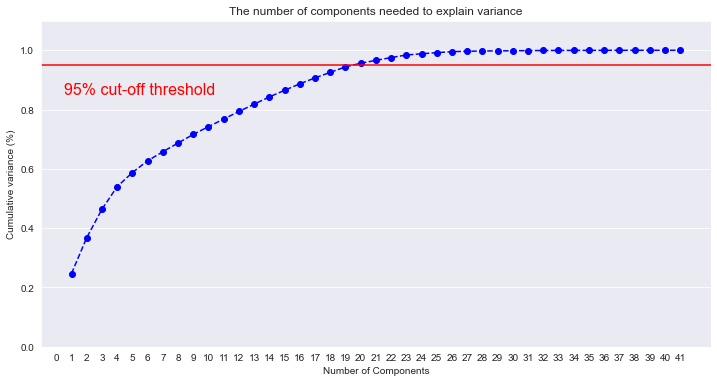

In [19]:
scaler = StandardScaler()

data_rescaled = scaler.fit_transform(data)

pca = PCA().fit(data_rescaled)

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 42, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 42, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [20]:
#95% of variance

from sklearn.decomposition import PCA

pca = PCA(n_components = 21)

pca.fit(X_train)

reduced = pca.transform(X_train)

In [21]:
pca.explained_variance_ratio_

array([0.24715968, 0.12108035, 0.09591815, 0.08147153, 0.04741105,
       0.03935754, 0.03153053, 0.03053189, 0.02916939, 0.02624694,
       0.02579228, 0.02553654, 0.02462563, 0.02441985, 0.02176918,
       0.02064171, 0.01884082, 0.01822022, 0.01680274, 0.0124607 ,
       0.00969315])

In [22]:
print(reduced[10])

[ 5.59066023e+00 -2.26376692e+00  3.75032753e-01 -2.15793535e-02
 -1.43042592e-01 -4.16751942e-01  3.87097028e-02 -1.21125522e-02
  9.90436207e-02  8.53791733e-02  1.40276573e-02 -1.42837071e-02
  5.71888124e-02 -7.11616319e-02 -9.54107794e-02 -7.26090638e-03
  1.04901126e-02 -5.81198187e-04 -6.31857336e-03 -3.15739732e-01
  1.07672918e-01]


In [44]:
# kmeans revised

# k-means clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=21)
kk=kmeans.fit(X_train, Y_train)



In [45]:
kmeans.cluster_centers_

array([[-6.52662024e-02,  2.54227578e-02,  9.80245147e-02,
        -6.62267296e-03, -3.79909080e-02, -3.31976172e-03,
         3.31209803e-02, -1.04340473e-02,  2.12209679e+00,
         6.57811477e-03, -1.13232670e-02, -1.93223932e-04,
         5.92035568e-03,  1.67264498e-02, -1.03643705e-02,
        -2.70156080e-02,  0.00000000e+00,  0.00000000e+00,
        -3.64828746e-02, -1.51933607e+00, -1.14035653e+00,
        -4.59982112e-01, -4.58709840e-01, -2.40776134e-01,
        -2.30510367e-01,  5.35529723e-01, -2.44841731e-01,
         8.49715798e-01, -1.44410932e+00,  2.50006394e-01,
         3.67981483e-01, -1.52610841e-01, -1.08024872e+00,
         3.09658334e-01, -4.58846125e-01, -4.61128636e-01,
        -2.21091301e-01, -2.15591063e-01, -1.14567146e+00,
        -1.44454047e+00, -5.21770766e-01],
       [-6.75389332e-02, -2.84422099e-02, -2.57930431e-02,
        -6.62267296e-03, -4.71608798e-02, -3.31976172e-03,
        -4.37429331e-02, -1.04340473e-02, -4.16306954e-01,
        -5.69

In [46]:
kmeans.labels_

array([2, 2, 1, ..., 3, 0, 1])

In [47]:
sample_test=np.array([-6.73342207e-02, -2.39887492e-03, -2.73701074e-02,
        -8.00650223e-03, -4.82464260e-02, -3.31976172e-03,
        -4.38349460e-02, -8.93766633e-03, -4.17001576e-01,
        -5.88367325e-03, -9.54451296e-03, -4.92860067e-03,
        -5.97199665e-03, -1.31371145e-02, -9.71967264e-03,
        -2.73889976e-02,  0.00000000e+00,  0.00000000e+00,
        -3.69435783e-02,  8.14655377e-01,  8.64687381e-01,
        -4.64486503e-01, -4.63894241e-01, -2.47513346e-01,
        -2.48108628e-01,  5.36461931e-01, -2.53329721e-01,
        -2.04275434e-01,  3.47515485e-01,  6.20871337e-01,
         5.95347003e-01, -2.81780462e-01,  8.23578968e-01,
        -1.59714599e-01, -4.64772262e-01, -4.63574127e-01,
        -2.51653528e-01, -2.49051056e-01,  8.42220335e-01,
         1.30727157e-01, -5.29575443e-01])
second_test=sample_test.reshape(1, -1)
kmeans.predict(second_test)

array([2])

In [48]:
y=kk.predict(X_test)

In [49]:
print(y)

[2 2 1 ... 2 2 1]


In [51]:
print("Accuracy:",metrics.accuracy_score(Y_test, y))

Accuracy: 0.15573256143475972


In [ ]:
# gaussian naive bayes

gnb = GaussianNB()
y1_pred = gnb.fit(X_train, Y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y1_pred))

In [ ]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
y2_pred = dtc.fit(X_train, Y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y2_pred))

In [ ]:
# svm

from sklearn.svm import LinearSVC

svc= LinearSVC(max_iter=10)
y3_pred = svc.fit(X_train, Y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y3_pred))

In [ ]:
# k-means clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=21)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)

#kmeans.cluster_centers_

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(data)
    kmeans.fit(data)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
# k-means clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=21)
y_kmeans = kmeans.fit_predict(X_train)
print(y_kmeans)

#kmeans.cluster_centers_

In [ ]:
print("Accuracy = " ,metrics.accuracy_score(Y_train, y_kmeans))

In [ ]:
# svm once more
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, Y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, Y_train)

In [ ]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [ ]:
poly_accuracy = accuracy_score(Y_test, poly_pred)
poly_f1 = f1_score(Y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

In [ ]:
rbf_accuracy = accuracy_score(Y_test, rbf_pred)
rbf_f1 = f1_score(Y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

In [ ]:
# fully connected neural network

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K


In [ ]:
sess = tf.compat.v1.keras.backend.get_session()

In [ ]:
from keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(Dense(184,input_dim=41,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(92,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(23,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy', 
                                                                        tf.keras.metrics.Precision(), 
                                                                        tf.keras.metrics.Recall(),
                                                                        tf.keras.metrics.TruePositives(),
                                                                        tf.keras.metrics.TrueNegatives(), 
                                                                        tf.keras.metrics.FalsePositives(), 
                                                                        tf.keras.metrics.FalseNegatives()])

In [ ]:
print(model.summary())

In [ ]:
y_train=np_utils.to_categorical(Y_train,num_classes=23)
y_test=np_utils.to_categorical(Y_test,num_classes=23)
print("Shape of y_train",Y_train.shape)
print("Shape of y_test",Y_test.shape)

In [ ]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=10,verbose=1)

In [ ]:
# k means
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=23)
y_predicted = km.fit_predict(data[['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'lnum_compromised',
       'lroot_shell', 'lsu_attempted', 'lnum_root', 'lnum_file_creations',
       'lnum_shells', 'lnum_access_files', 'lnum_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type', 'service', 'flag']])
y_predicted

In [ ]:
print("Accuracy = " ,metrics.accuracy_score(Y, y_predicted))

In [ ]:
len(y_predicted)

In [ ]:
# GAUSSIAN NAIVE BAYES

print("Confusion Matrix for Naive Bayes")

cm = confusion_matrix(Y_test, y1_pred)

print(cm)

# DECISION TREE

print("Confusion Matrix for Decision Tree")

cm = confusion_matrix(Y_test, y2_pred)

print(cm)

# SVM

print("Confusion Matrix for SVM")

cm = confusion_matrix(Y_test, y3_pred)

print(cm)

# K-MEANS CLUSTERING

print("Confusion Matrix for K-Means Clustering")

cm = confusion_matrix(Y_test, y1_pred)

print(cm)

# FULLY CONNECTED NEURAL NETWORK

print("Confusion Matrix for Neural Network")

cm = confusion_matrix(Y_test, y1_pred)

print(cm)

In [ ]:
# GAUSSIAN NAIVE BAYES

# Accuracy

print("Accuracy = " ,metrics.accuracy_score(Y_test, y1_pred)) # definition too

# Precision

print("Precision = " ,metrics.precision_score(Y_test, y1_pred))

# Recall

print("Recall = " ,metrics.recall_score(Y_test, y1_pred))

# F1 score

print("F1 score = " ,metrics.f1_score(Y_test, y1_pred))

In [ ]:
# DECISION TREE

# Accuracy

print("Accuracy = " ,metrics.accuracy_score(Y_test, y2_pred))

# Precision

print("Precision = " ,metrics.precision_score(Y_test, y2_pred))

# Recall

print("Recall = " ,metrics.recall_score(Y_test, y2_pred))

# F1 score

print("F1 score = " ,metrics.f1_score(Y_test, y2_pred))


In [ ]:
# SVM

# Accuracy

print("Accuracy = " ,metrics.accuracy_score(Y_test, y3_pred))

# Precision

print("Precision = " ,metrics.precision_score(Y_test, y3_pred))

# Recall

print("Recall = " ,metrics.recall_score(Y_test, y3_pred))

# F1 score

print("F1 score = " ,metrics.f1_score(Y_test, y3_pred))